# Predicting heart disease using machine learning

This notebook looks into various Python-based libraries of machine learning and data science in an attempt to build a machine learning model capable of predicting wheather or not someone had heart disease or not based on their medical attributes.

Approach used:
1. Problem Definition
2. Data
3. Evaluation
4. Features
5. Modelling 
6. Experimentation


## 1.Problem Definition 
>Given clinical parameter about a patient can we predict weather or not they have heart disease?



## 2.Data

This database contains 76 attributes, but all published experiments refer to using a subset of 14 of them. In particular, the Cleveland database is the only one that has been used by ML researchers to this date.

The "goal" field refers to the presence of heart disease in the patient. It is integer valued from 0 (no presence) to 4.

**Kaggle Version** : https://www.kaggle.com/ronitf/heart-disease-uci

**Original Database** : https://archive.ics.uci.edu/ml/datasets/heart+Disease




## 3.Evaluation
>If we can reach 90% accuracy at predicting wheather or not a person has a heart disease during the proof of concept , we'll pursue the project 

## 4.Features

**Create Data Directory**

* age
* sex
* chest pain type (4 values)
* resting blood pressure
* serum cholestoral in mg/dl
* fasting blood sugar > 120 mg/dl
* resting electrocardiographic results (values 0,1,2)
* maximum heart rate achieved
* exercise induced angina
* oldpeak = ST depression induced by exercise relative to rest
* the slope of the peak exercise ST segment
* number of major vessels (0-3) colored by flourosopy
* thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
* Target 1 or 0

## Preparing the tools
We are going to use Pandas,Matplotlib and NumPy for data Analysis and manipulation

In [51]:
# Importing all the tools we need

# Regular EDA(exploratory data analysis) and plotting libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Importing pycaret

from pycaret.classification import *

# Models from sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

#Model Evaluations 
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.metrics import plot_roc_curve

### Import the dataset

In [52]:
df = pd.read_csv("heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [53]:
df.shape

(303, 14)

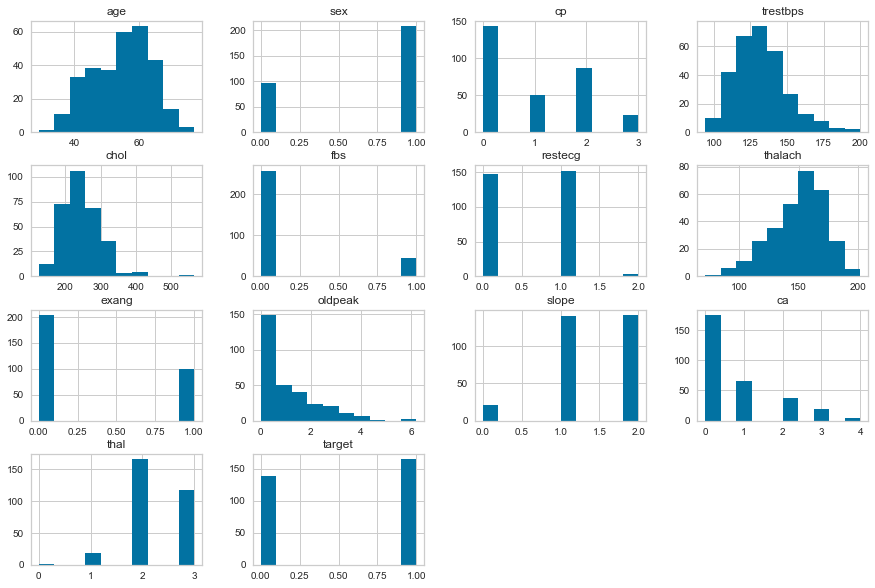

In [54]:
df.hist(figsize=(15, 10));

In [55]:
df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

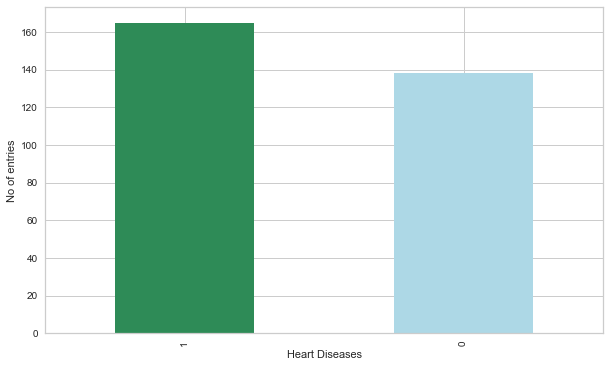

In [56]:
df.target.value_counts().plot(kind= "bar",color = ["seagreen","lightblue"],figsize=(10,6),xlabel = 'Heart Diseases',ylabel = "No of entries");

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [58]:
#Are there any missning values
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [59]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Making a Correlation Matrix

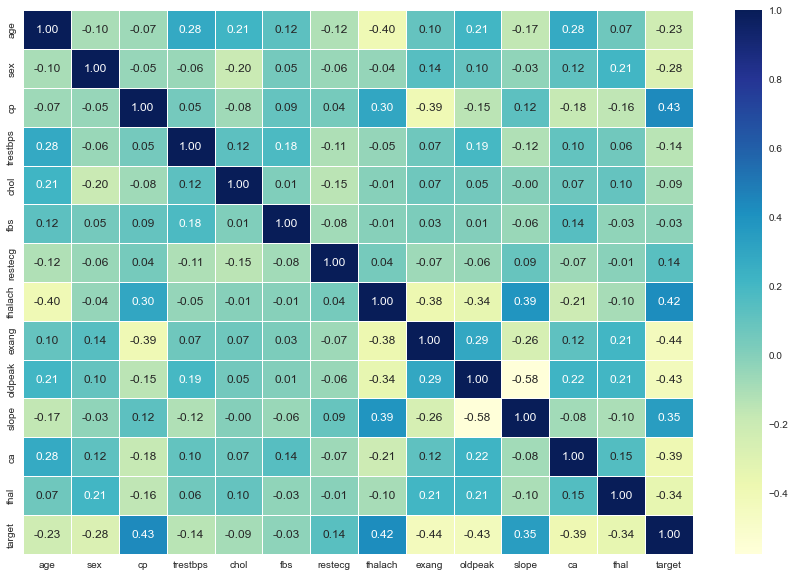

In [60]:
corr_matrix = df.corr();
fig,ax = plt.subplots(figsize = (15,10))
ax = sns.heatmap(corr_matrix,
                annot = True,
                linewidth = 0.5,
                fmt = ".2f",
                cmap = "YlGnBu");


## 5.Modelling 

In [61]:
# Preparing data for training the model

categorical_val = []
continous_val = []
for column in df.columns:
    if len(df[column].unique())<=9:
        categorical_val.append(column)
    else:
        continous_val.append(column)

In [62]:
categorical_val

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [63]:
categorical_val.remove('target')
dataset = pd.get_dummies(df, columns = categorical_val)
dataset.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,63,145,233,150,2.3,1,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
1,37,130,250,187,3.5,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
2,41,130,204,172,1.4,1,1,0,0,1,...,1,1,0,0,0,0,0,0,1,0
3,56,120,236,178,0.8,1,0,1,0,1,...,1,1,0,0,0,0,0,0,1,0
4,57,120,354,163,0.6,1,1,0,1,0,...,1,1,0,0,0,0,0,0,1,0


In [64]:
print(df.columns)
print(dataset.columns)

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')
Index(['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'target', 'sex_0',
       'sex_1', 'cp_0', 'cp_1', 'cp_2', 'cp_3', 'fbs_0', 'fbs_1', 'restecg_0',
       'restecg_1', 'restecg_2', 'exang_0', 'exang_1', 'slope_0', 'slope_1',
       'slope_2', 'ca_0', 'ca_1', 'ca_2', 'ca_3', 'ca_4', 'thal_0', 'thal_1',
       'thal_2', 'thal_3'],
      dtype='object')


In [65]:
expriment  = setup(dataset,target = 'target')

,Description,Value
0,session_id,2136
1,Target,target
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(303, 31)"
5,Missing Values,False
6,Numeric Features,30
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [67]:
np.random.seed(4)
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.8437,0.9144,0.8871,0.8494,0.8615,0.6834,0.6971,0.0300
rf,Random Forest Classifier,0.8392,0.9182,0.8697,0.8498,0.8550,0.6748,0.6842,0.0400
ridge,Ridge Classifier,0.8390,0.0000,0.8780,0.8451,0.8550,0.6742,0.6873,0.0030
et,Extra Trees Classifier,0.8299,0.9055,0.8712,0.8377,0.8471,0.6555,0.6719,0.0350
lda,Linear Discriminant Analysis,0.8294,0.9127,0.8780,0.8305,0.8469,0.6547,0.6700,0.0030
lightgbm,Light Gradient Boosting Machine,0.8251,0.9049,0.8424,0.8452,0.8388,0.6469,0.6558,0.0050
gbc,Gradient Boosting Classifier,0.7972,0.9007,0.8280,0.8232,0.8177,0.5903,0.6052,0.0120
nb,Naive Bayes,0.7913,0.8489,0.8167,0.8056,0.8067,0.5778,0.5845,0.0030
ada,Ada Boost Classifier,0.7866,0.8749,0.8182,0.8043,0.8049,0.5701,0.5798,0.0140
dt,Decision Tree Classifier,0.7264,0.7254,0.7508,0.7580,0.7460,0.4502,0.4599,0.0040


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=2136, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

#### Since we see that logistic regression gives the best scores we will proceed the project with our main model as logistic regression

In [83]:
# Importing the model from sklearn

from sklearn.linear_model import LogisticRegression

# Importing all the necessary libraries

from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

# Evaluation

from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.metrics import plot_roc_curve



In [72]:
model = LogisticRegression()

In [73]:
# Splitting X and Y

X = dataset.drop(["target"],axis = 1)
Y = dataset["target"]

In [74]:
# Splitting the data into train and test

np.random.seed(4)
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)

In [75]:
model.fit(X_train,Y_train);

print("The Score of the model before tuning is : ",round(model.score(X_test,Y_test)*100,2),"%")

The Score of the model before tuning is :  91.8 %


## Hyperparameter tuning

### By RandomizedSearchCV

In [76]:
# Create Hyperparameter grid for Logistic Regression 

log_reg_grid = {"C":np.logspace(-3,3,50),
                "solver":['newton-cg', 'liblinear' ]}

# "penalty":['l1', 'l2', 'elasticnet', 'none']

# Tune LogisticRegression

np.random.seed(4)

rsCV_log_reg = RandomizedSearchCV(LogisticRegression(),
                                 param_distributions=log_reg_grid,
                                 cv = 10,
                                 n_iter = 20,
                                  verbose = True)

rsCV_log_reg.fit(X_train,Y_train)

Fitting 10 folds for each of 20 candidates, totalling 200 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    2.1s finished


RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=100,
                                                multi_class='auto', n_jobs=None,
                                                penalty='l2', random_state=None,
                                                solver='lbfgs', tol=0.0001,
                                                verbose=0, warm_start=False),
                   iid='deprecated', n_iter=20, n_jobs=None,
                   param_distributions={'C'...
       2.55954792e+01, 3.39322177e+01, 4.49843267e+01, 5.96362332e+01,
       7.90604321e+01, 1.04811313e+02, 1.38949549e+02, 1.84206997e+02,
       2.44205309e+02, 3.23745754e+02, 4.29193426e+02, 5.68986603e+02,
       7.54312006e+0

In [77]:
print("The Accuracy of this model after tuning is:",round(rsCV_log_reg.score(X_test,Y_test)*100,2),"%") 
print("The best parameter after tuning are: ",rsCV_log_reg.best_params_)


The Accuracy of this model after tuning is: 93.44 %
The best parameter after tuning are:  {'solver': 'liblinear', 'C': 0.655128556859551}


### By GridSearchCV

In [80]:
# Create Hyperparameter grid for Logistic Regression 

log_reg_grid = {"C":np.logspace(-3,3,50),
                "solver":['newton-cg', 'liblinear' ],
               "penalty":['l1', 'l2', 'elasticnet', 'none']}



# Tune LogisticRegression(GridSearchCV)


gsCV_log_reg  = GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_grid,
                          cv = 10,
                          verbose = True)

gsCV_log_reg.fit(X_train,Y_train)

Fitting 10 folds for each of 400 candidates, totalling 4000 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 4000 out of 4000 | elapsed:  1.1min finished


GridSearchCV(cv=10, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': array([1.00000000e-03, 1....
       2.55954792e+01, 3.39322177e+01, 4.49843267e+01, 5.96362332e+01,
       7.90604321e+01, 1.04811313e+02, 1.38949549e+02, 1.84206997e+02,
       2.44205309e+02, 3.23745754e+02, 4.29193426e+02, 5.68986603e+02,
       7.54312006e+02, 1.00000000e+03]),
                         'penalty': ['

In [81]:
print("The score of this model using this method is",round(gsCV_log_reg.score(X_test,Y_test)*100,2),"%")
print("The best parameter for this model is:",gsCV_log_reg.best_params_)

The score of this model using this method is 91.8 %
The best parameter for this model is: {'C': 0.15998587196060574, 'penalty': 'l2', 'solver': 'newton-cg'}


### ROC curve and AUC metric

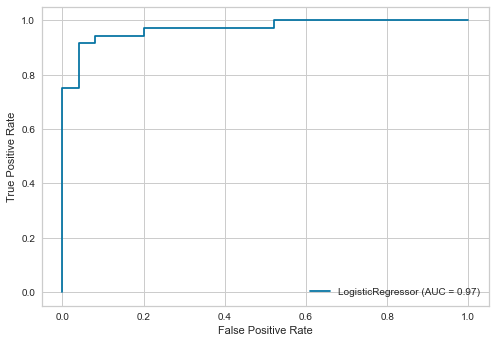

In [85]:
# Plot ROC curve and calculate AUC metric

plot_roc_curve(rsCV_log_reg,X_test,Y_test,name = "LogisticRegressor");

### Confusion Matrix

In [86]:
# Create a function for confusion_matrix

def plot_conf_mat(Y_test,y_preds,Title):
    
    sns.set(font_scale = 1.5)
    """
    Plots a confusion matric based on sns heatmap
    
    """
    
    fig,ax = plt.subplots(figsize = (5,4))
    
    ax = sns.heatmap(confusion_matrix(Y_test,y_preds),
                    annot = True)
    plt.xlabel("True Label")
    plt.ylabel("Predicted label ")
    plt.title(Title)

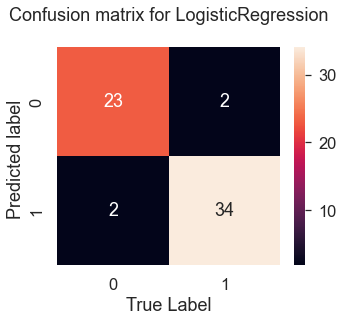

In [87]:
# plotting confusion matrix(LogisticRegression)

Title1 = "Confusion matrix for LogisticRegression\n"

y_preds_lof_reg = rsCV_log_reg.predict(X_test)

plot_conf_mat(Y_test,y_preds_lof_reg,Title1)

## Classification Report as well as cross-validated precision,recall, and F10-score

In [90]:
names = ['No Disease','Disease']
print("-Classification Report for Logistic Regression model\n",classification_report(Y_test,y_preds_lof_reg,target_names=names))


-Classification Report for Logistic Regression model
               precision    recall  f1-score   support

  No Disease       0.92      0.92      0.92        25
     Disease       0.94      0.94      0.94        36

    accuracy                           0.93        61
   macro avg       0.93      0.93      0.93        61
weighted avg       0.93      0.93      0.93        61



### Calculate evaluation metrics using cross-validation

We are going to calculate accuracy,precision,recall and F1 score of our model using cross_validation

In [91]:
# Function for cross-validation for accuracy,precision,recall and f1 score

def c_metrics(model,cv_value):
    
    """
    A function to calculate cross-validated classification matrix for any machine learning model
    
    """
    # Cross-validated accuracy
    cv_acc = cross_val_score(model,X,Y,cv = cv_value,scoring = 'accuracy')
    cv_acc = np.mean(cv_acc)
    
    # Cross-validated Precision
    cv_pre = cross_val_score(model,X,Y,cv = cv_value,scoring = 'precision')
    cv_pre = np.mean(cv_pre)
    
    # Cross-valiated Recall
    cv_recall = cross_val_score(model,X,Y,cv = cv_value,scoring = 'recall')
    cv_recall = np.mean(cv_recall)
    
    # Cross-validated F1
    cv_f1 = cross_val_score(model,X,Y,cv = cv_value,scoring = 'f1')
    cv_f1 = np.mean(cv_f1)
    
    # Cross-validated metrix
    cv_metrics = pd.DataFrame({"Accuracy":cv_acc,
                          "Precision":cv_pre,
                          "Recall":cv_recall,
                          "F1":cv_f1},index=[0])
    cv_metrics.T.plot.bar(title = "Cross-validated classification matrix",
                      figsize = (10,6),
                      color = "Seagreen",
                      legend = False)

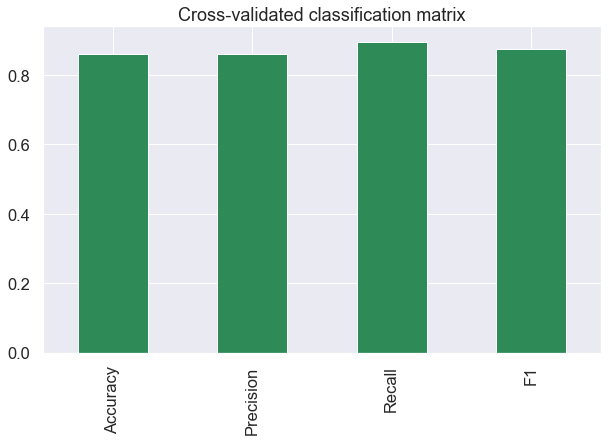

In [97]:
model = LogisticRegression(solver = 'liblinear', C = 0.655128556859551)

c_metrics(model,10)

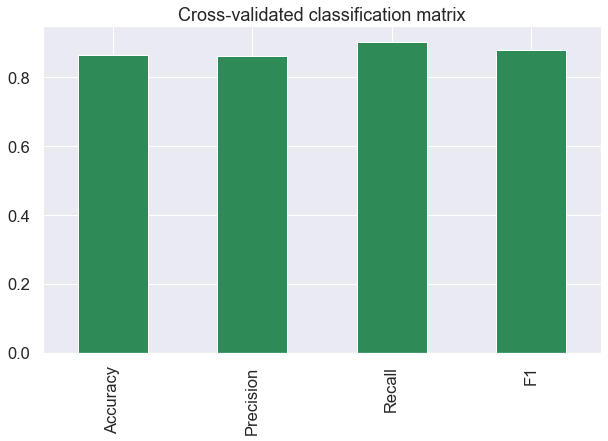

In [98]:
model = LogisticRegression(C = 0.15998587196060574, penalty = 'l2', solver = 'newton-cg')

c_metrics(model,10)

### Feature Importance

Feature importance is asking ,"Which features contributed most to the outcome of a model and how did they contribute"

Lets find the feature importance of LogisticRegression model

In [101]:
model = LogisticRegression(C = 0.15998587196060574, penalty = 'l2', solver = 'newton-cg')
model.fit(X_train,Y_train);

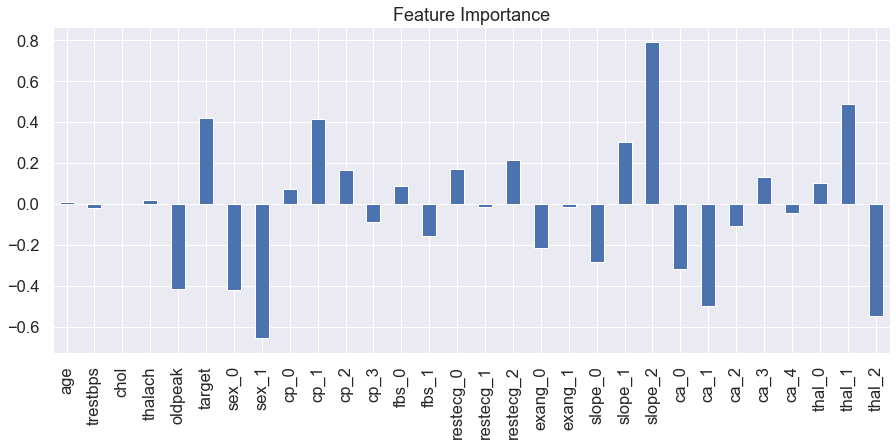

In [110]:
feature_dict = dict(zip(dataset.columns,list(model.coef_[0])))
feature_df = pd.DataFrame(feature_dict,index=[0])
feature_df.T.plot.bar(title = "Feature Importance",legend = False,figsize = (15,6));

In [103]:
save_model(model, model_name='Linear-Regression')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='target',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strat...
                 ('feature_select', 'passthrough'), ('fix_multi', 'passthrough'),
                 ('dfs', 'passthrough'), ('pca', 'passthrough'),
                 ['trained_model',
                  LogisticRegression(C=0.15998587196060574, class_weight=None,
             